# 3. Next prediction (fbprophet)

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fbprophet import Prophet

In [108]:
data_url = 'data.pkl'
df = pd.read_pickle(data_url)
df.head()

,Date,usd_aud,Fuel_price,Oil_price
33,2019-06-03,0.6977,127.3,53.25
34,2019-06-04,0.6991,127.3,53.50
35,2019-06-05,0.6970,127.3,51.57
36,2019-06-06,0.6977,127.3,52.59
37,2019-06-07,0.6999,126.3,53.95


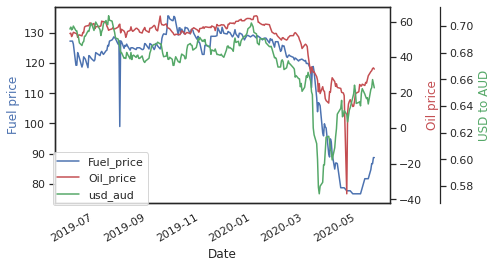

In [109]:
# Let's plot the raw data
ax = df.plot(x="Date", y="Fuel_price", legend=False, color="b")
ax2 = ax.twinx()
df.plot(x="Date", y="Oil_price", ax=ax2, legend=False, color="r")
ax3 = ax.twinx()
ax3.spines["right"].set_position(("axes", 1.15))
df.plot(x="Date", y="usd_aud", ax=ax3, legend=False, color="g")

ax.set_xlabel("Date")
ax.set_ylabel("Fuel price")
ax2.set_ylabel("Oil price")
ax3.set_ylabel("USD to AUD")

ax.yaxis.label.set_color(color="b")
ax2.yaxis.label.set_color(color="r")
ax3.yaxis.label.set_color(color="g")

ax.figure.legend(bbox_to_anchor=(0.11, 0.2), loc='lower left')
plt.show()

## Using fb prophet

### Fuel price

In [110]:
# prepare data for the model
df_ph_f = df.loc[:, ['Fuel_price', 'Date']]
df_ph_f.rename(columns={'Fuel_price':'y', 'Date':'ds'}, inplace=True)

In [111]:
# fit the model
m = Prophet()
m.fit(df_ph_f)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [112]:
# make a dataframe of future dates
future = m.make_future_dataframe(periods=7)
future.tail()

,ds
246,2020-05-25
247,2020-05-26
248,2020-05-27
249,2020-05-28
250,2020-05-29


In [113]:
# create some predictons
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
246,2020-05-25,68.033727,61.259032,74.045482
247,2020-05-26,67.961777,61.691957,74.349258
248,2020-05-27,68.001480,61.736625,74.402467
249,2020-05-28,68.220290,62.246936,74.529730
250,2020-05-29,67.759748,61.568998,74.192696


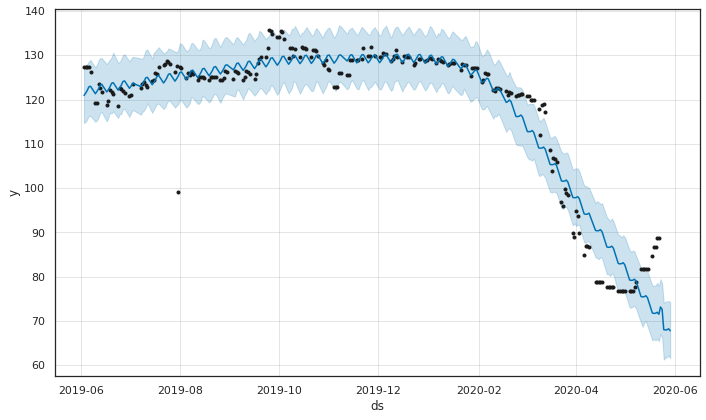

In [114]:
fig1 = m.plot(forecast)

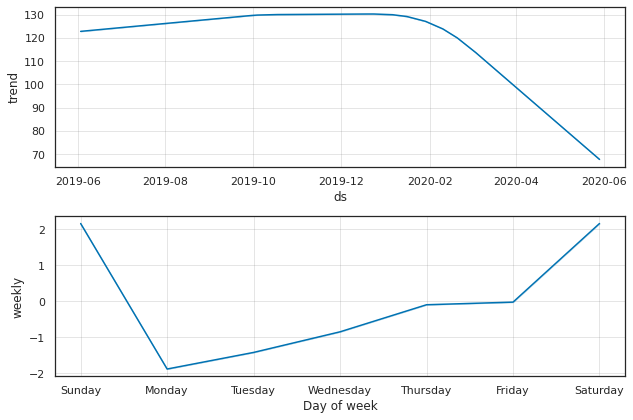

In [115]:
fig2 = m.plot_components(forecast)

### Oil price

In [116]:
# prepare data for the model
df_ph_f = df.loc[:, ['Oil_price', 'Date']]
df_ph_f.rename(columns={'Oil_price':'y', 'Date':'ds'}, inplace=True)

In [117]:
# fit the model
m = Prophet()
m.fit(df_ph_f)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [118]:
# make a dataframe of future dates
future = m.make_future_dataframe(periods=7)
future.tail()

,ds
246,2020-05-25
247,2020-05-26
248,2020-05-27
249,2020-05-28
250,2020-05-29


In [119]:
# create some predictons
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
246,2020-05-25,12.044324,3.733964,21.043326
247,2020-05-26,13.053214,4.194458,21.828498
248,2020-05-27,12.606502,3.305697,21.348825
249,2020-05-28,12.741942,3.760252,21.717320
250,2020-05-29,12.602946,4.122901,21.793691


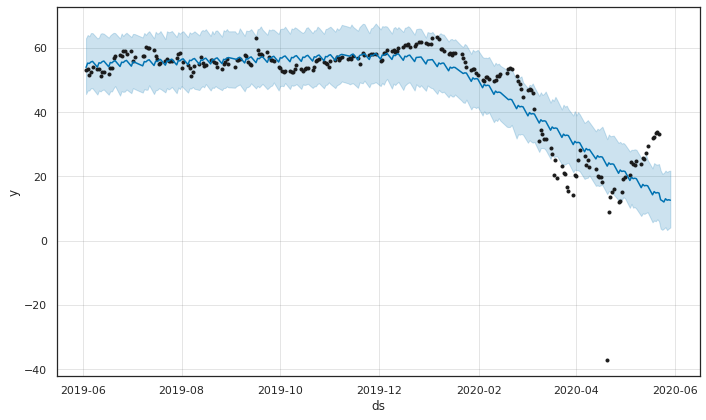

In [120]:
fig1 = m.plot(forecast)

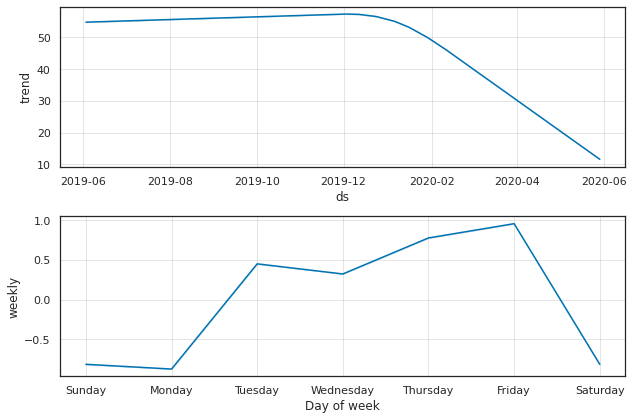

In [121]:
fig2 = m.plot_components(forecast)

### usd_aud

In [122]:
# prepare data for the model
df_ph_f = df.loc[:, ['usd_aud', 'Date']]
df_ph_f.rename(columns={'usd_aud':'y', 'Date':'ds'}, inplace=True)

In [123]:
# fit the model
m = Prophet()
m.fit(df_ph_f)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [124]:
# make a dataframe of future dates
future = m.make_future_dataframe(periods=7)
future.tail()

,ds
246,2020-05-25
247,2020-05-26
248,2020-05-27
249,2020-05-28
250,2020-05-29


In [125]:
# create some predictons
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
246,2020-05-25,0.651165,0.637861,0.664676
247,2020-05-26,0.651879,0.638479,0.664302
248,2020-05-27,0.651583,0.638134,0.665015
249,2020-05-28,0.652518,0.639341,0.665856
250,2020-05-29,0.652778,0.638927,0.665837


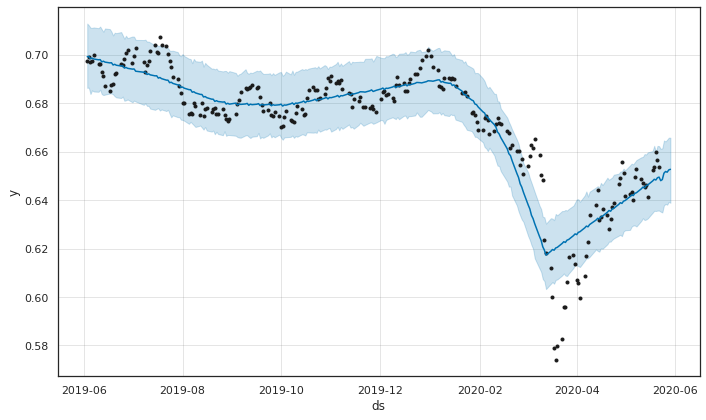

In [126]:
fig1 = m.plot(forecast)

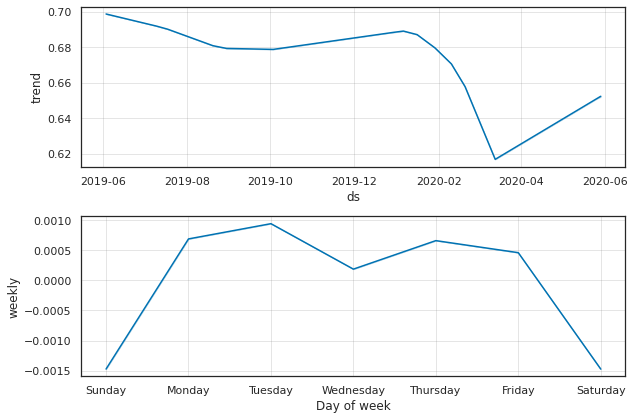

In [127]:
fig2 = m.plot_components(forecast)

Can't find any way to correlate between these. Looking for another approach.